<a href="https://colab.research.google.com/github/shogo1998/opencv/blob/main/opencv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imgなど変数が同じセルがあるので、戻って実行すると意図しない実行結果になる。

画像を保存したいときはimwriteを使う（すべてコメントアウトしてある）

#読み込み　表示

In [6]:
#サポートパッチのインポート
from google.colab.patches import cv2_imshow

#画像のインポート

import cv2


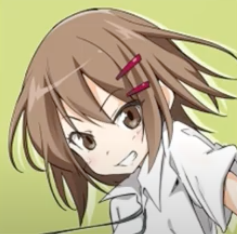

In [7]:
img = cv2.imread('input.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

#グレー画像変換
グレー画像として読み込む

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)でグレー画像に変換する

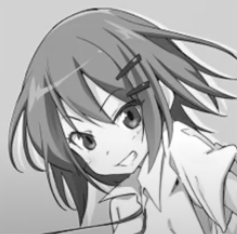

In [8]:
img = cv2.imread('input.png', 0)
cv2_imshow(img)

In [11]:
#-*- coding:utf-8 -*-
import cv2
    
# 入力画像の読み込み
img = cv2.imread("input.png")
    
# グレースケール変換   
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
# グレースケール画像の書き込み
# cv2.imwrite("gray.png", gray)

# BGR, B, G, R, Grayの2次元配列を確認
print("BGR=", img)
print("-------------")

# print("Blue=", img[:,:,0])
# print("-------------")

# print("Green=", img[:,:,1])
# print("-------------")

# print("Red=", img[:,:,2])
print("-------------")
print("gray=", gray)

BGR= [[[135 224 213]
  [138 223 213]
  [142 223 213]
  ...
  [138 221 211]
  [138 221 211]
  [143 225 215]]

 [[136 224 213]
  [138 223 213]
  [141 223 213]
  ...
  [138 222 212]
  [139 223 213]
  [139 223 213]]

 [[136 223 213]
  [138 223 213]
  [141 223 213]
  ...
  [138 222 212]
  [138 223 213]
  [137 223 213]]

 ...

 [[116 187 178]
  [116 186 178]
  [116 186 178]
  ...
  [122 186 179]
  [109 182 173]
  [106 185 175]]

 [[116 186 177]
  [116 186 177]
  [116 185 177]
  ...
  [116 181 174]
  [105 178 169]
  [106 185 175]]

 [[120 189 180]
  [120 189 180]
  [119 189 180]
  ...
  [116 183 175]
  [108 181 172]
  [106 185 175]]]
-------------
-------------
gray= [[211 210 211 ... 209 209 213]
 [211 210 211 ... 209 210 210]
 [210 210 211 ... 209 210 210]
 ...
 [176 176 176 ... 177 171 173]
 [175 175 175 ... 171 167 173]
 [178 178 178 ... 173 170 173]]


#RGB

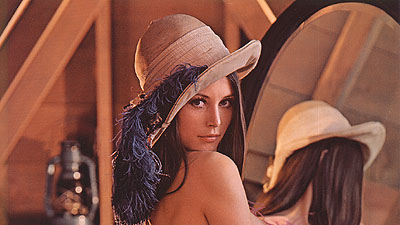

In [18]:
import cv2

im = cv2.imread('lena.jpeg')
cv2_imshow(im)

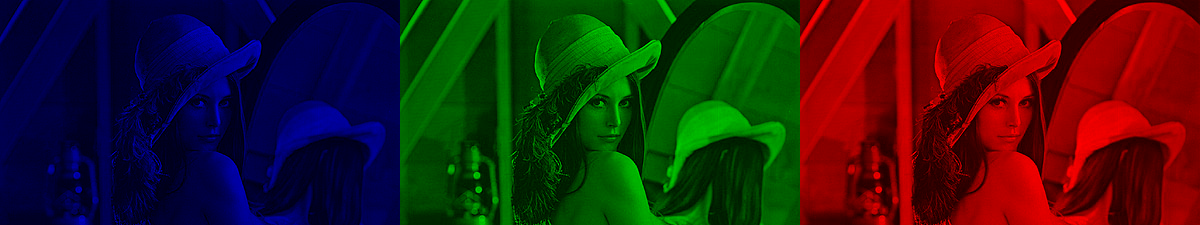

In [13]:
from PIL import Image
import numpy as np
im = cv2.imread('lena.jpeg')

im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0

# 横に並べて結合（どれでもよい）
im_RGB = np.concatenate((im_R, im_G, im_B), axis=1)
# im_RGB = np.hstack((im_R, im_G, im_B))
# im_RGB = np.c_['1', im_R, im_G, im_B]

pil_img_RGB = Image.fromarray(im_RGB)
cv2_imshow(im_RGB)

連続して実行すると色成分がなくなって真っ黒な画像が出るので、画像を読み込んだ直後に出力したい色のセルを実行してくだ


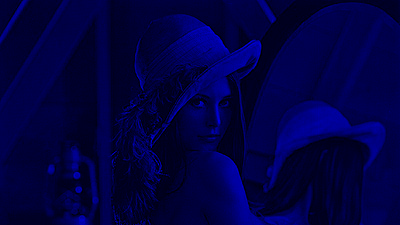

In [14]:
im[:, :, (1, 2)] = 0  #全ピクセルの色データの1,2番目(GとB)の数値を０にする
cv2_imshow(im)

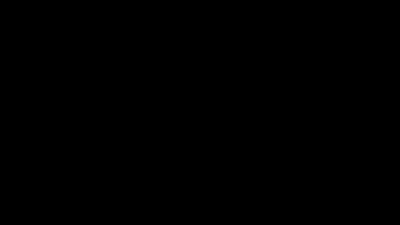

In [ ]:
im[:, :, (0, 2)] = 0
cv2_imshow(im)

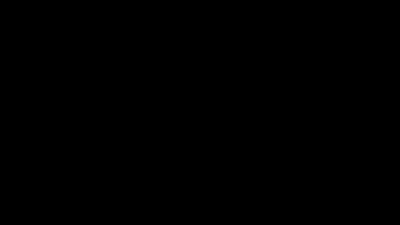

In [ ]:
im[:, :, (0, 1)] = 0
cv2_imshow(im)

#窓画像

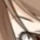

In [15]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# 入力画像とテンプレート画像をで取得
img = cv2.imread("input.png")

# 窓画像の左上座標　位置の設定
x, y = 50, 100

# 窓画像の幅・高さ
w, h = 40, 40

# 入力画像から窓画像を切り取り
roi = img[y:y+h, x:x+w]

# 窓画像の保存
# cv2.imwrite("output.png", roi)
cv2_imshow(roi)

#部分処理

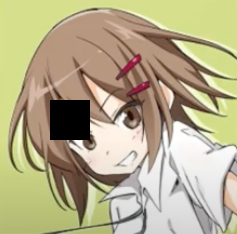

In [16]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# 入力画像とテンプレート画像をで取得
img = cv2.imread("input.png")

# 窓画像の左上座標
x, y = 50, 100

# 窓画像の幅・高さ
w, h = 40, 40

# 窓画像を黒塗り(画素値を0に)
img[y:y+h, x:x+w] = 0

# 画像の書き込み
# cv2.imwrite("output.png", img)
cv2_imshow(img)

#HSV

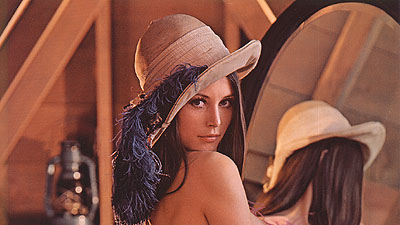

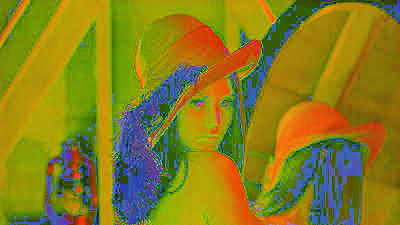

In [19]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np


# 入力画像の読み込み
img = cv2.imread("lena.jpeg")

# 方法2(OpenCVで実装)       
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    
# 結果を出力
# cv2.imwrite("test\hsv.jpg", hsv)
cv2_imshow(im)
cv2_imshow(hsv)

#カラートラッキング

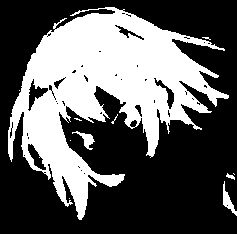

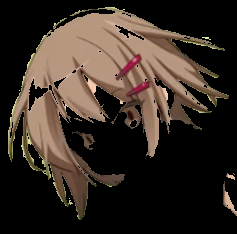

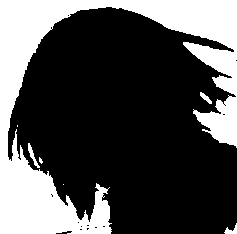

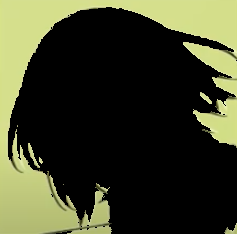

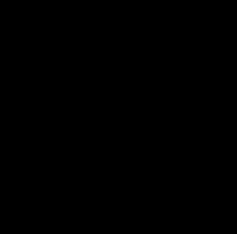

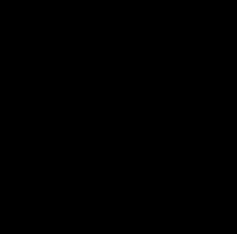

In [20]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# 赤色の検出
def detect_red_color(img):
    # 1 HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 赤色のHSVの値域1　（違うのは赤成分の0〜３０、150~179だけ）
    hsv_min = np.array([0,64,0])#H S Vの順
    hsv_max = np.array([30,255,255])
    mask1 = cv2.inRange(hsv, hsv_min, hsv_max)#２　マスク画像を作成　[画像,下限,上限]　

    # 赤色のHSVの値域2　（違うのは赤成分の0〜３０、150~179だけ）
    hsv_min = np.array([150,64,0])
    hsv_max = np.array([179,255,255])
    mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色領域のマスク（255：赤色、0：赤色以外）    
    mask = mask1 + mask2

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img

# 緑色の検出
def detect_green_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 緑色のHSVの値域1
    hsv_min = np.array([30, 64, 0])#numpyの配列で下限を指定する
    hsv_max = np.array([90,255,255])

    # 緑色領域のマスク（255：赤色、0：赤色以外）    
    mask = cv2.inRange(hsv, hsv_min, hsv_max)
    
    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img

# 青色の検出
def detect_blue_color(img):
    # HSV色空間に変換
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # 青色のHSVの値域1
    hsv_min = np.array([90, 64, 0])
    hsv_max = np.array([150,255,255])

    # 青色領域のマスク（255：赤色、0：赤色以外）    
    mask = cv2.inRange(hsv, hsv_min, hsv_max)

    # マスキング処理
    masked_img = cv2.bitwise_and(img, img, mask=mask)

    return mask, masked_img


# 入力画像の読み込み
img = cv2.imread("input.png")

# 色検出（赤、緑、青）
red_mask, red_masked_img = detect_red_color(img)#関数へマスク画像変数とマスキング画像変数を入れる
green_mask, green_masked_img = detect_green_color(img)
blue_mask, blue_masked_img = detect_blue_color(img)

# 結果を出力
# cv2.imwrite("C:\prog\python\\test\\red_mask.png", red_mask)
# cv2.imwrite("C:\prog\python\\test\\red_masked_img.png", red_masked_img)
# cv2.imwrite("C:\prog\python\\test\green_mask.png", green_mask)
# cv2.imwrite("C:\prog\python\\test\green_masked_img.png", green_masked_img)
# cv2.imwrite("C:\prog\python\\test\\blue_mask.png", blue_mask)
# cv2.imwrite("C:\prog\python\\test\\blue_masked_img.png", blue_masked_img)

cv2_imshow(red_mask)
cv2_imshow(red_masked_img)
cv2_imshow(green_mask)
cv2_imshow(green_masked_img)
cv2_imshow(blue_mask)
cv2_imshow(blue_masked_img)

#2値化(手動)

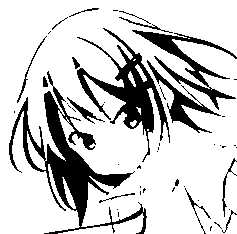

In [21]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np


# 閾値 127より小さい画素値は真っ黒にしてしまう　（勝手に決めているだけ
threshold_value = 127

# 入力画像の読み込み
img = cv2.imread("input.png")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
# 方法2 （OpenCVで実装）      
ret, threshold_img = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)    

# 　
# cv2.imwrite("niti.png", threshold_img)
cv2_imshow(threshold_img)

#2値化(自動　適応的2値化処理)

In [22]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
    
# 入力画像を読み込み
img = cv2.imread("nit.jpeg")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
# 方法2       
dst = cv2.adaptiveThreshold(gray,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,2)

    
# 結果を出力
# cv2.imwrite("output.png", dst)
cv2_imshow(dst)

error: ignored

###他2値化処理(ガウガシアン)

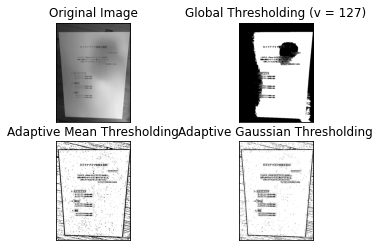

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread("nit.jpeg",0)
# img = cv2.medianBlur(img,5)

ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

titles=['Original Image', 'Global Thresholding (v = 127)','Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
# cv2_imshow(th3)
# cv2_imshow(th2)
# cv2_imshow(th1)
# cv2_imshow(img)

#畳み込み　平滑化

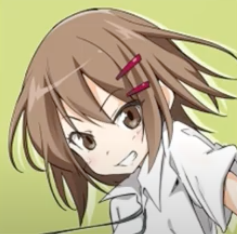

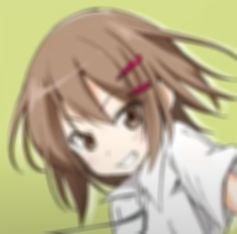

In [23]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# load image (grayscale)
# 入力画像を読み込み
img = cv2.imread("input.png", 1)

# Spatial filtering
# 方法3(OpenCVで実装)
dst = cv2.blur(img, ksize=(6, 6))

# output
# 結果を出力
# cv2.imwrite("output.png", dst)
cv2_imshow(img)
cv2_imshow(dst)

#メディアンフィルタ

In [24]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# load image (grayscale)
# 入力画像をグレースケールで読み込み
gray = cv2.imread("inpu.png", 0)

# Spatial filtering
# 方法2
dst = cv2.medianBlur(gray, ksize=3)

# output
# 結果を出力
# cv2.imwrite("output.png", dst)
cv2_imshow(gray)
cv2_imshow(dst)

AttributeError: ignored

#ガンマ補正　明るさ補正

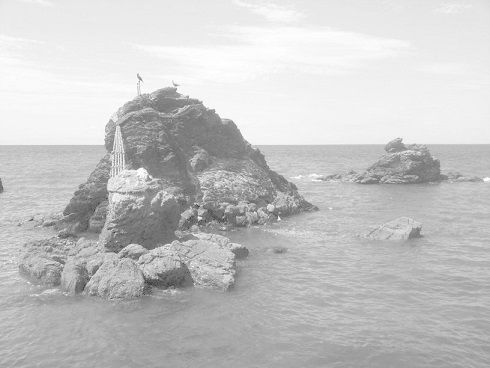

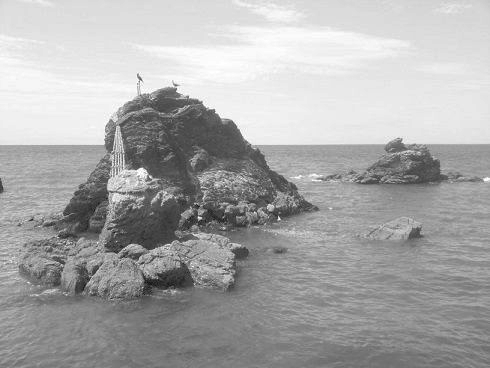

In [26]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# 入力画像を読み込み
img = cv2.imread("input (1).jpeg")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 線形濃度変換 
gamma = 0.6

# 画素値の最大値 
imax = gray.max()

# ガンマ補正
gray = imax * (gray / imax)**(1/gamma)

# 結果の出力
# cv2.imwrite("output2.jpg", gray)
cv2_imshow(img)
cv2_imshow(gray)


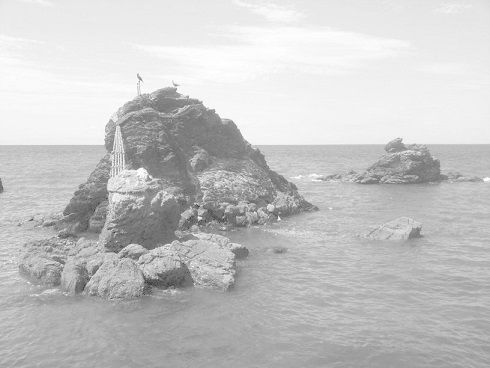

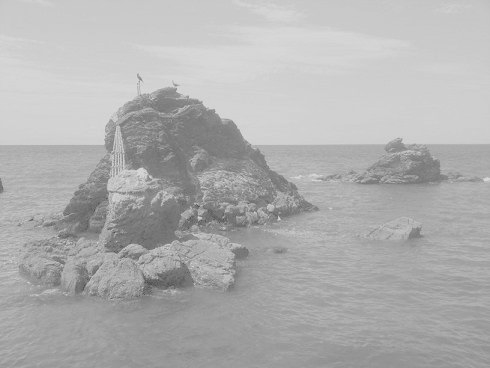

In [ ]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# 入力画像を読み込み
img = cv2.imread("input (1).jpeg")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 線形濃度変換
a, k = 0.7, 20
zmin, zmax = 20.0, 220.0

# 変換1
# gray = a * gray    #aが0~1なら暗くなる

# 変換2
# gray = gray + k    #上限決めてるので一部暗くなる  

# 変換3
# gray = a * (gray - 127.0) + 127.0

# 変換4
#gray = gray.max() * (gray - zmin)/(zmax - zmin) 

# 画素値を0～255の範囲内に収める
gray[gray < 0] = 0
gray[gray > 255] = 255

# 結果の出力
cv2_imshow(img)
cv2_imshow(gray)


#ヒストグラム

In [33]:
img = cv2.imread("input.png")

In [34]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [35]:
def show_img(path):

    img = cv2.imread(path)
    b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]
    hist_b = cv2.calcHist([b],[0],None,[256],[0,256])
    hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
    hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
    plt.plot(hist_r, color='r', label="r")
    plt.plot(hist_g, color='g', label="g")
    plt.plot(hist_b, color='b', label="b")
    plt.legend()
    plt.show() 
    
    img2 = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = img2[:,:,0], img2[:,:,1], img2[:,:,2]
    hist_h = cv2.calcHist([h],[0],None,[256],[0,256])
    hist_s = cv2.calcHist([s],[0],None,[256],[0,256])
    hist_v = cv2.calcHist([v],[0],None,[256],[0,256])
    plt.plot(hist_h, color='r', label="h")
    plt.plot(hist_s, color='g', label="s")
    plt.plot(hist_v, color='b', label="v")
    plt.legend()
    plt.show()

    return hist_r,hist_g, hist_b, hist_h, hist_s, hist_v

In [36]:
r,g,b,h,s,v = show_img("input.png")

NameError: ignored

RGBヒストグラム

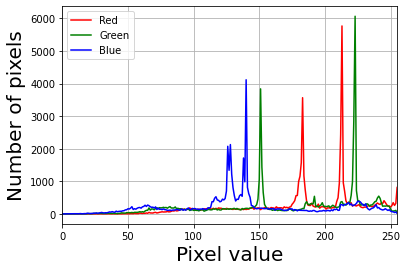

In [ ]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
from matplotlib import pyplot as plt


# 入力画像を読み込み
img = cv2.imread("input.png")
    
b, g, r = img[:,:,0], img[:,:,1], img[:,:,2]

# 方法1(NumPyでヒストグラムの算出)
hist_r, bins = np.histogram(r.ravel(),256,[0,256])
hist_g, bins = np.histogram(g.ravel(),256,[0,256])
hist_b, bins = np.histogram(b.ravel(),256,[0,256])

# 方法2(OpenCVでヒストグラムの算出)
#hist_r = cv2.calcHist([r],[0],None,[256],[0,256])
#hist_g = cv2.calcHist([g],[0],None,[256],[0,256])
#hist_b = cv2.calcHist([b],[0],None,[256],[0,256])

# グラフの作成
plt.xlim(0, 255)
plt.plot(hist_r, "-r", label="Red")
plt.plot(hist_g, "-g", label="Green")
plt.plot(hist_b, "-b", label="Blue")
plt.xlabel("Pixel value", fontsize=20)
plt.ylabel("Number of pixels", fontsize=20)
plt.legend()
plt.grid()
plt.show()

#輪郭

ラプラシアンフィルタ

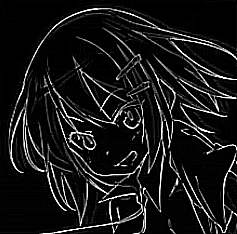

In [37]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# 入力画像を読み込み
img = cv2.imread("input.png")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 方法3
dst = cv2.Laplacian(gray, cv2.CV_32F, ksize=3)

# 結果を出力
# cv2.imwrite("output.png", dst)
cv2_imshow(dst)

Cannyエッジ　

①輪郭の検出漏れや誤検出が少ない。
②各点に一本の輪郭を検出する。
③真にエッジの部分を検出できる。

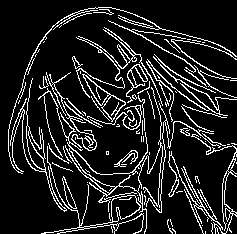

In [38]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np

# 入力画像を読み込み
img = cv2.imread("input.png")

# グレースケール変換
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 方法2(OpenCVで実装)
dst = cv2.Canny(gray, 100, 200)

# 結果を出力
# cv2.imwrite("output.png", dst)
cv2_imshow(dst)

#漫画風

In [39]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np

# 漫画化フィルタ
def manga_filter(src, screen, th1=60, th2=150):
    
    # グレースケール変換
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    screen = cv2.cvtColor(screen, cv2.COLOR_BGR2GRAY)
    
    # スクリーントーン画像を入力画像と同じ大きさにリサイズ　スクリーントーンと重ねるときの為　第一引数はリサイズしたい画像。　第二引数は変換後の幅と高さ（grayの幅と高さ。タプルで変更する）
    screen = cv2.resize(screen,(gray.shape[1],gray.shape[0]))

    # Cannyアルゴリズムで輪郭検出し、色反転　（Cannyフィルタはそのままなので真っ黒なので反転する必要がある。２５５から引いてやればよい）
    edge = 255 - cv2.Canny(gray, 80, 120)

    # 三値化（黒、灰色、白）
    gray[gray <= th1] = 0      #th1 60以下（設定した値）であれば黒色にする
    gray[gray >= th2] = 255   #th2 150以上（設定した値）であれば白色にする

  #灰色部分の画素値(条件)に引っかかるものをnp.whereで探す。
    gray[ np.where((gray > th1) & (gray < th2)) ] = screen[ np.where((gray > th1)&(gray < th2)) ]
    # 三値画像と輪郭画像を合成
    return cv2.bitwise_and(gray, edge)


# 入力画像とスクリーントーン画像を取得
img = cv2.imread("gh1.png")#入力画像
screen = cv2.imread("screen.png")#スクリーントーン画像
    
# 画像の漫画化
manga = manga_filter(img, screen, 60, 140)
    
# 結果を出力
# cv2.imwrite("output.jpg", manga)
cv2_imshow(manga)
cv2_imshow(img)

error: ignored

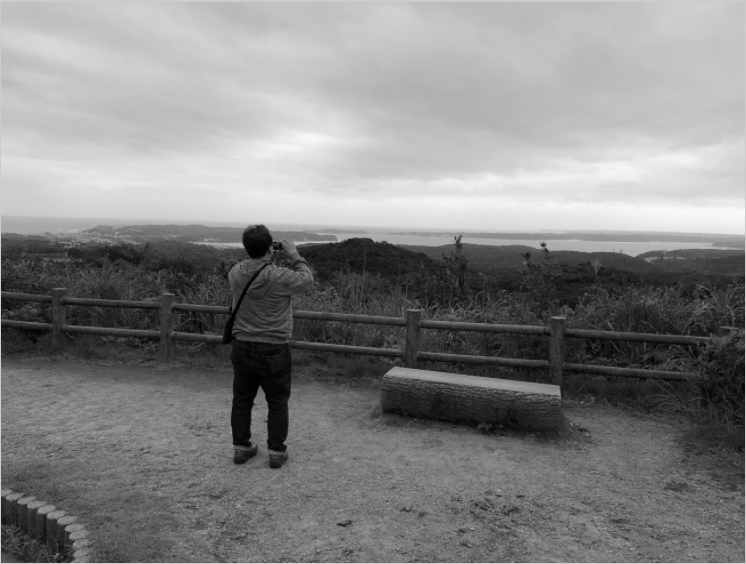

In [40]:
# グレースケール変換
img = cv2.imread("manga.png")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

In [ ]:
#numpy.where()を使うと、NumPy配列ndarrayに対して、条件を満たす要素を置換したり特定の処理を行ったりすることができる。条件を満たす要素のインデックス（位置）を取得することも可能。